<a href="https://colab.research.google.com/github/Hiszat/Data-Sains/blob/main/Pertemuan_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.0 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbv61k8ki
  JVM stdout: /tmp/tmpbv61k8ki/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbv61k8ki/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_grkvuf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file('/content/drive/MyDrive/DataSains/onlinefoods.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,C13
20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
24,Female,Single,Student,Below Rs.10000,Graduate,3,12.977,77.5773,560009,Yes,Positive,Yes
22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.985,77.5533,560010,Yes,Positive,Yes
27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
22,Male,Single,Student,No Income,Graduate,3,12.977,77.5773,560009,Yes,Positive,Yes
24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [ ]:
df.types

{'Age': 'int',
 'Gender': 'enum',
 'Marital Status': 'enum',
 'Occupation': 'enum',
 'Monthly Income': 'enum',
 'Educational Qualifications': 'enum',
 'Family size': 'int',
 'latitude': 'real',
 'longitude': 'real',
 'Pin code': 'int',
 'Output': 'enum',
 'Feedback': 'enum',
 'C13': 'enum'}

In [ ]:
numberical_features = [column for column, dtype in df.types.items() if dtype== 'int' or dtype == 'real']
categorical_features = [column for column, dtype in df.types.items() if dtype== 'enum']

In [ ]:
numberical_features

['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [ ]:
categorical_features

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback',
 'C13']

In [ ]:
df.isna().sum()

0.0

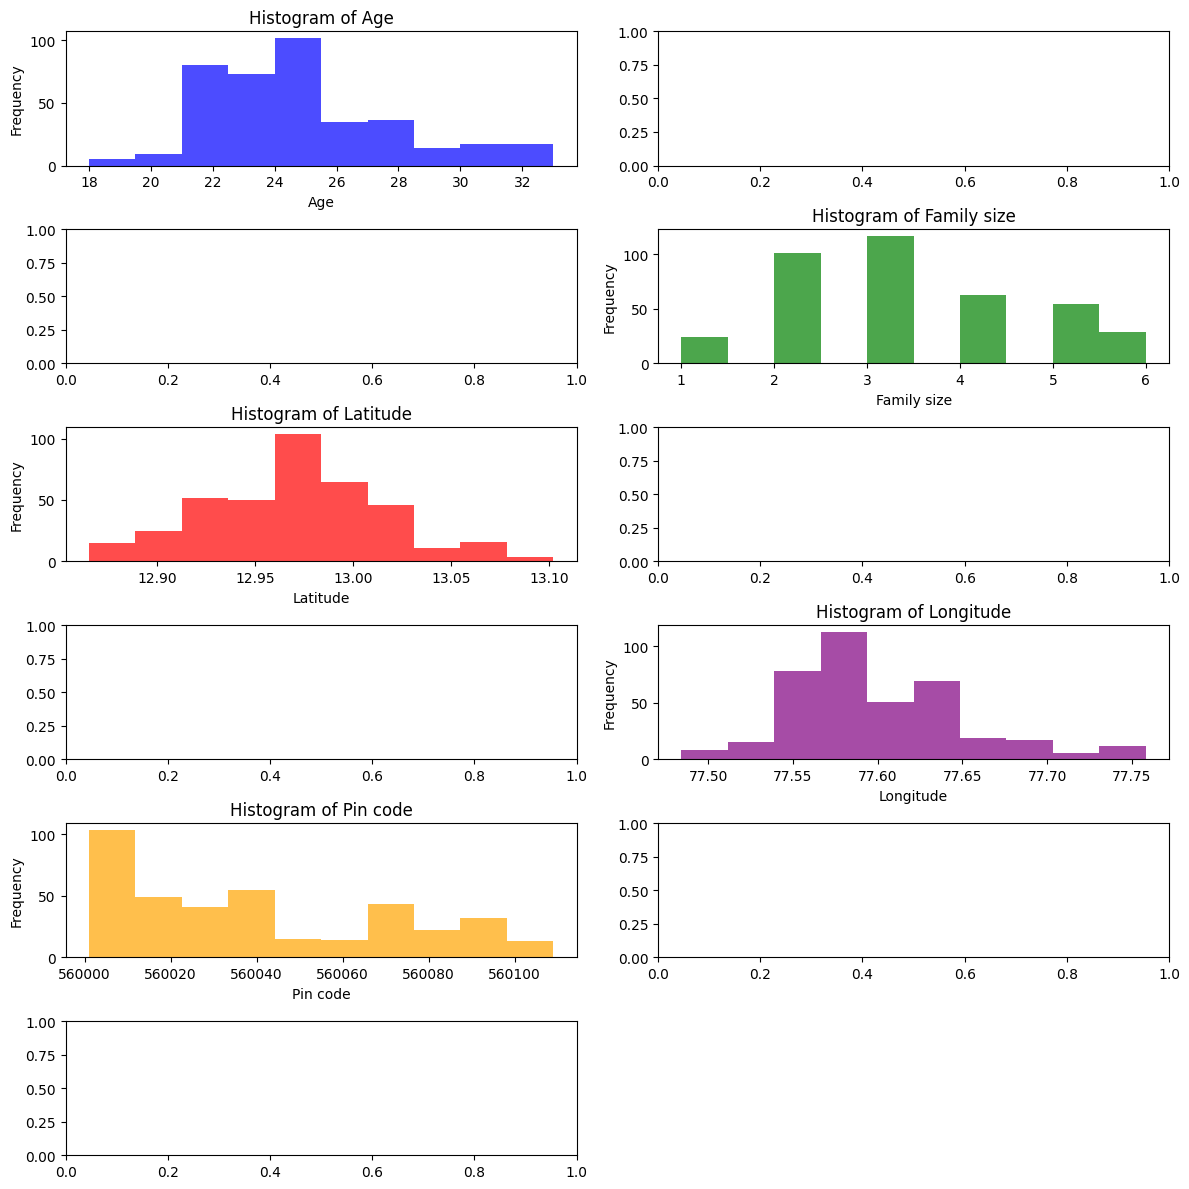

In [ ]:
if len(numberical_features) % 2 == 0:
  nrows = len(numberical_features)
else:
  nrows = (len(numberical_features)) + 1

fig, axs = plt.subplots(nrows, 2, figsize=(12, 12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, feature in enumerate(numberical_features):
  row = i
  col = i % 2
  axs[row, col].hist(df[feature].as_data_frame(), bins=10, color=colors[i], alpha=0.7)
  axs[row, col].set_title(f'Histogram of {feature.capitalize()}')
  axs[row, col].set_xlabel(feature.capitalize())
  axs[row, col].set_ylabel('Frequency')

if len(numberical_features) % 2 != 0:
  fig.delaxes(axs[nrows - 1, 1])

plt.tight_layout()
plt.show()